# Intuition
Consider the follwoing network,

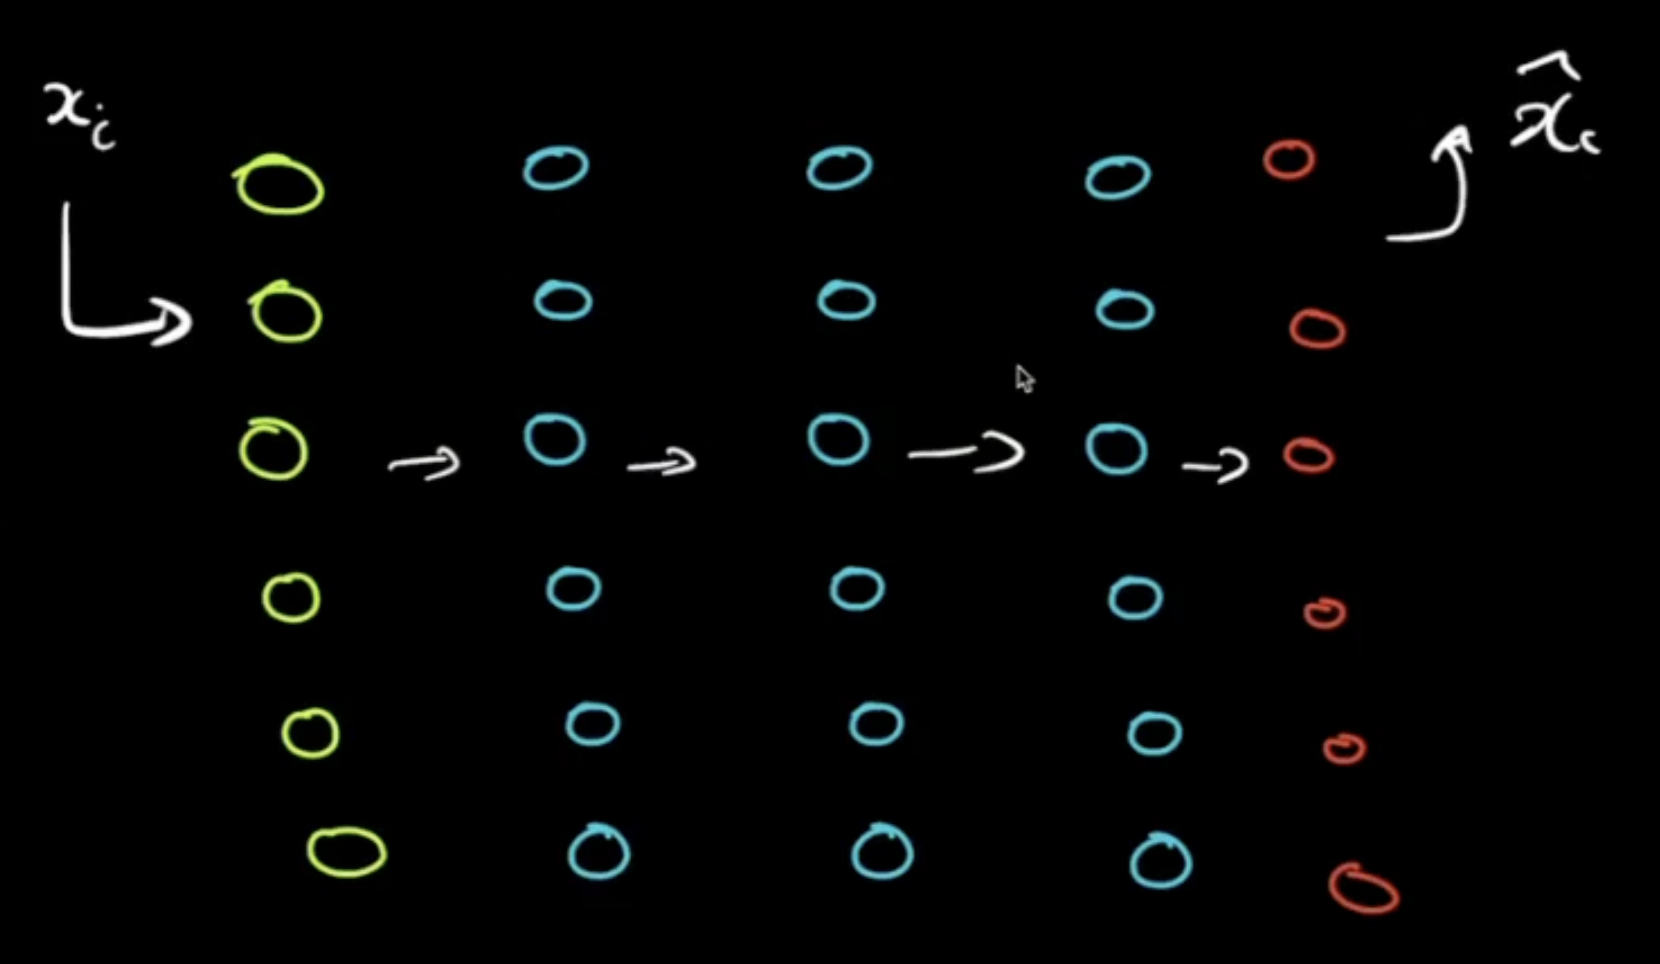

Notice that all the layers have the same umber of Neurons including the input and the output. The input to the Network is $x_i$ and the output is $\hat{x_i}$.

### Is it possible to feed $x_i$ to the Network and obtain $\hat{x_i}$ as output?
Yes, it is possible to achieve this by making all the activations as linear, i.e., whatever goes in, comes out and train the Neural Network to find the weights and biases.

Now, consider that a little complexity is introduced,

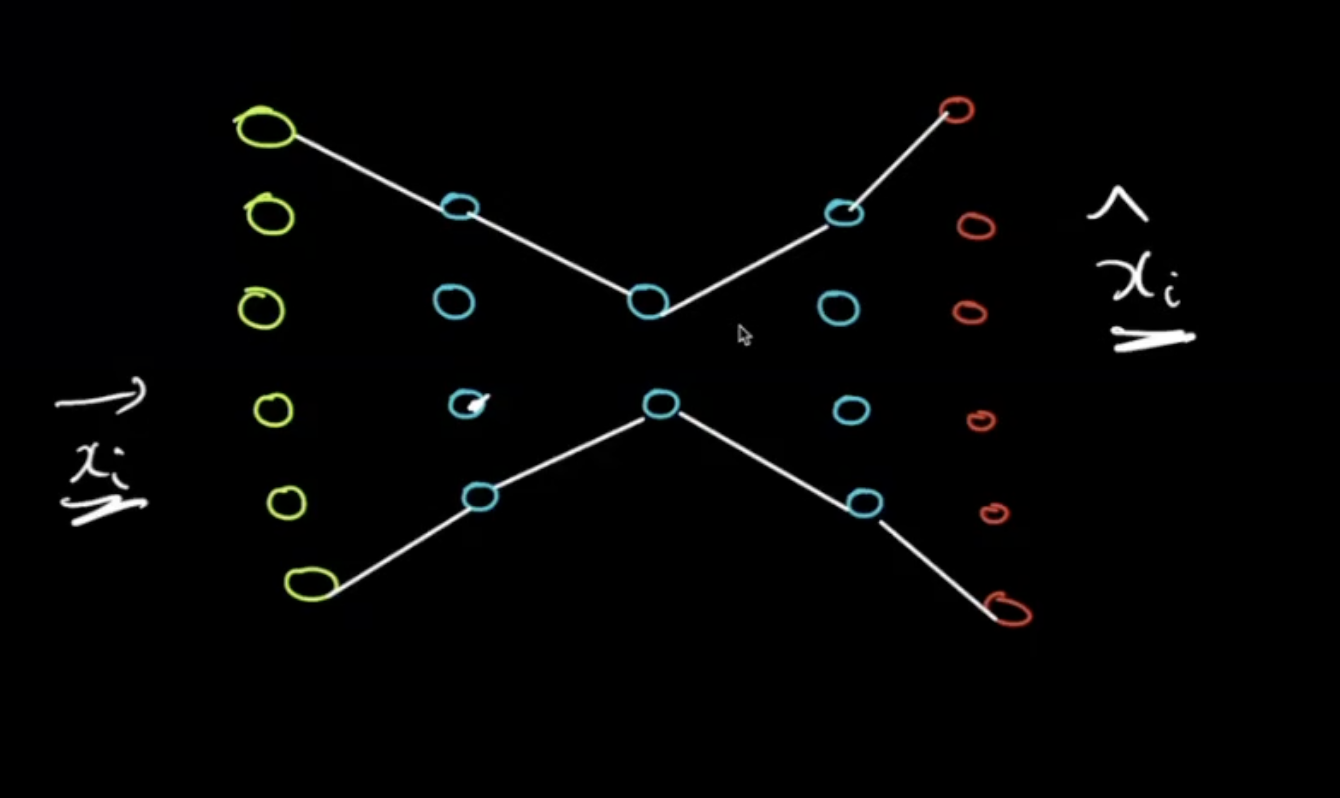

### Can input be made equal to the output ($x_i = \hat{x_i}$) for the Network in the above figure?
The task is possible. A predction can be made such that, $x_i ~ \hat{x_i}$.

A loss function can be decided on the problem,
- If the values are binary, `BinaryCrossentropy` can be used.
- For multi-class, `CategoricalCrossentropy` can be used.
- For continuous values, MSE or RMSE can be used.

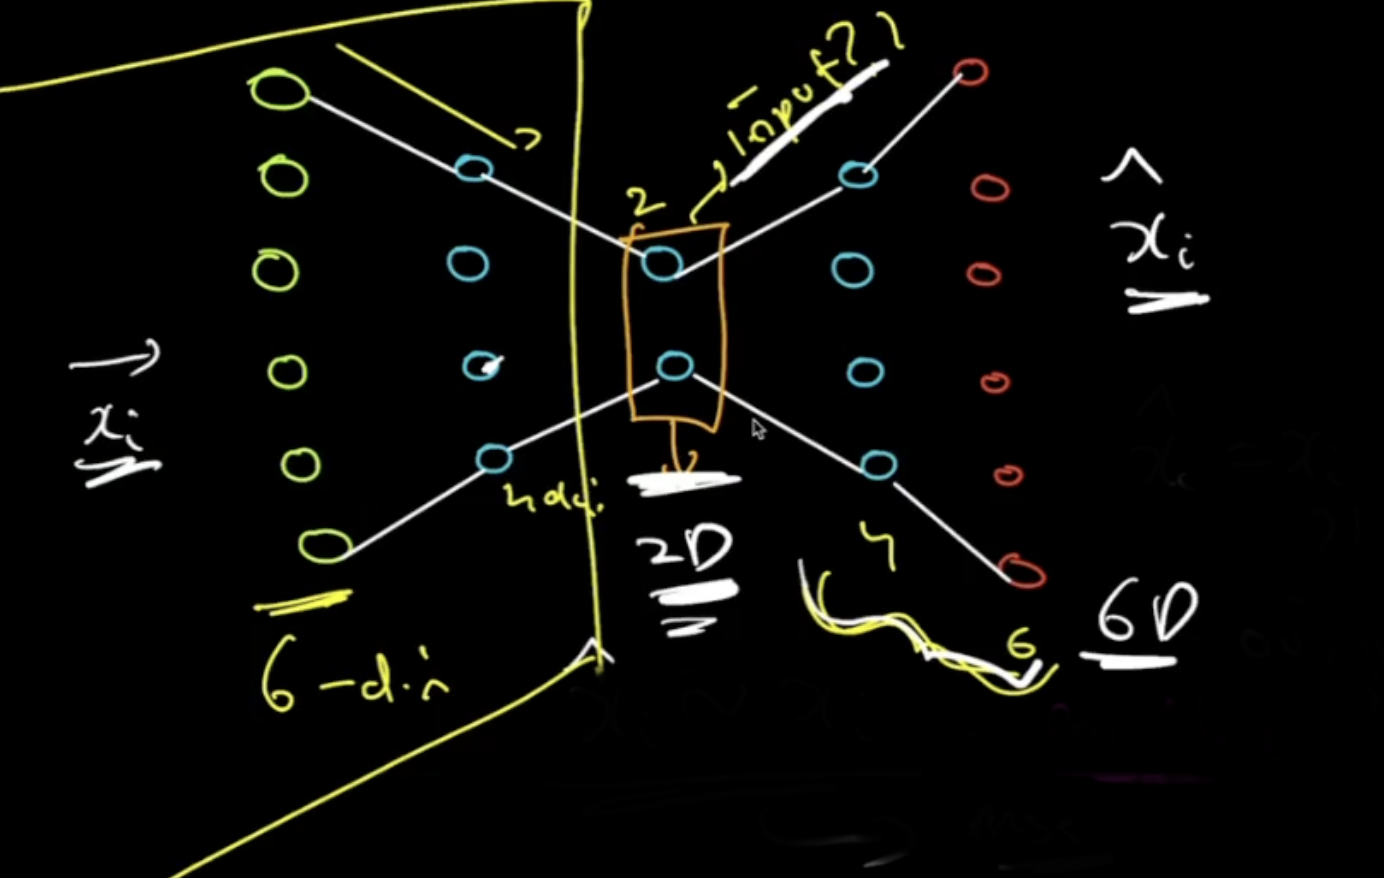

### What happened in the above Network?
The output from the input layer has 6 dimensions, this 6 dimensions were shrunk to 4 dimensions to be fed as input to the next layer. The 4 dimensions werare then shrunk to 2, to 4 and then back to 6 again.

Now consider the layer in the middle, i.e., layer with 2 Neuron and ignore the rest of the network before, it can be said that this middle layer is the input for the next layers. In other words, a 2D input gave 6D output.

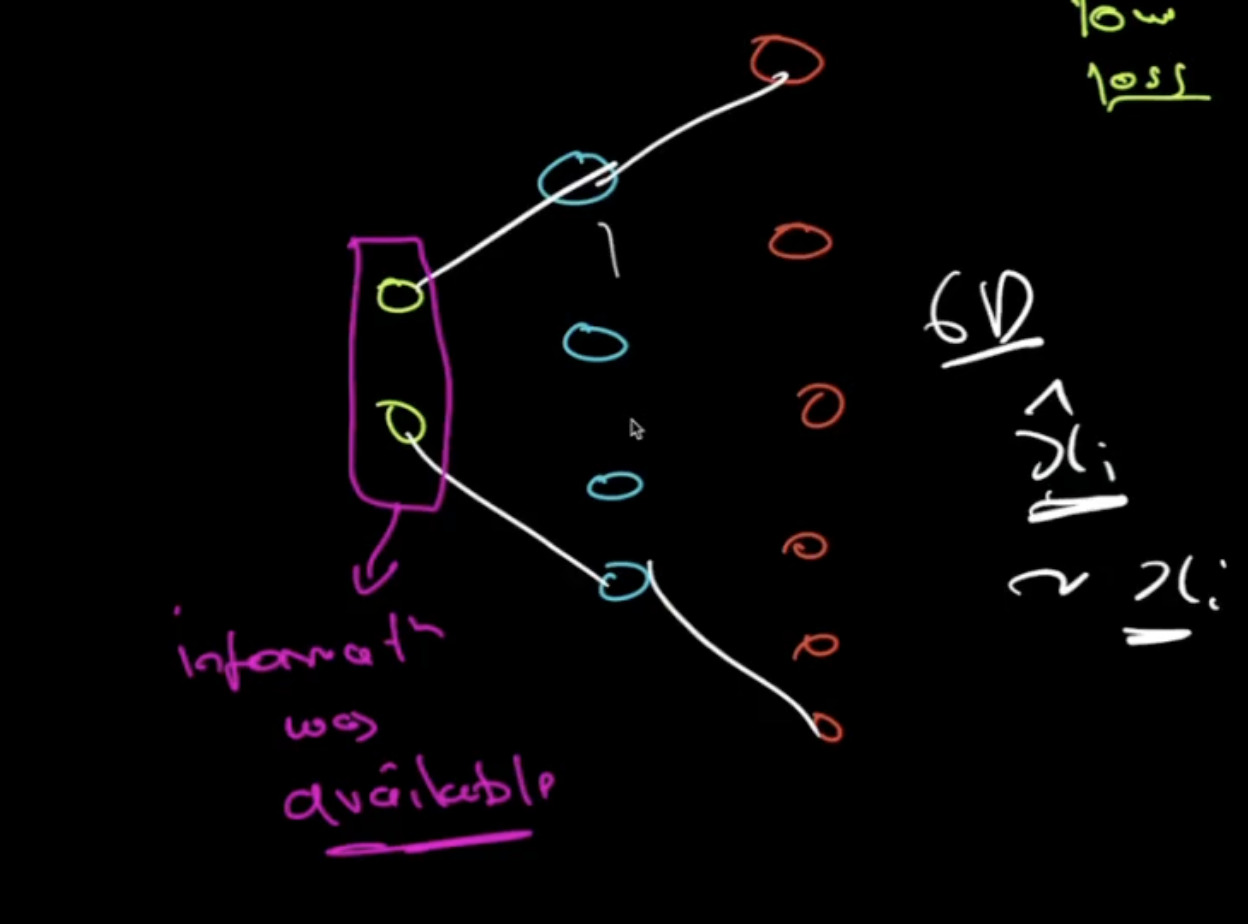

If it is possible to produce 6D output ($\hat{x_i}$) which is similar to $x_i$, it means all the information needed to produce this was available.

Now imagine that instead of 6D input vector, there is a sparse vector of 300D and using the Network it is being compressed down to 32Ds in the middle layer.

### Does this look like the data is being compressed?
Yes, essentially the dimensions of the input are being reduced.

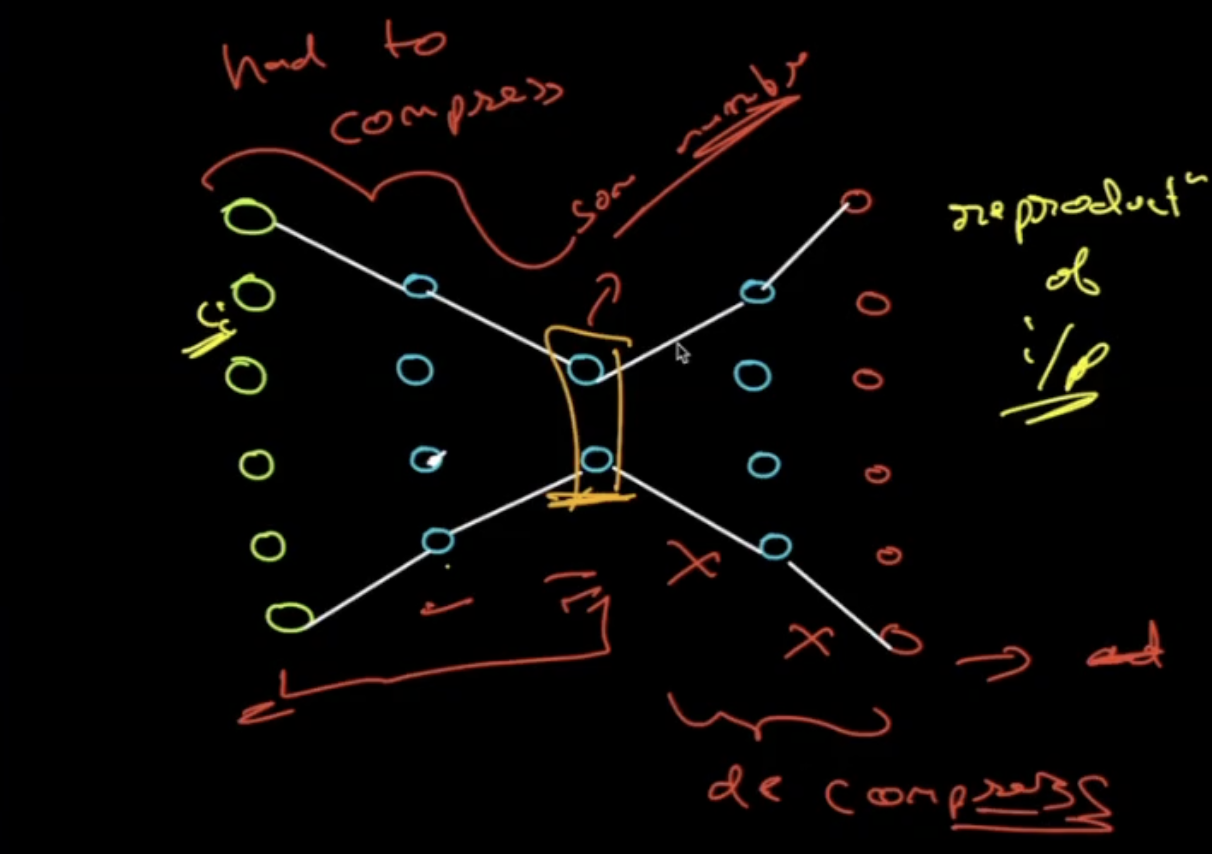

Therefore, in summary,
- The left part of the network is trying to compress the information, i.e., encoder.
- The right part of the network is decompressing it, i.e., decoder.

This has to happen such that, all the information would be stored in the middle layer. This means, the middle layer can be used as an embedding or encoding or latent features, i.e., the bottleneck can be used as features.

Such Networks are known as Autoencoders.

The purpose of the Network is to get the embedding.

# Applications

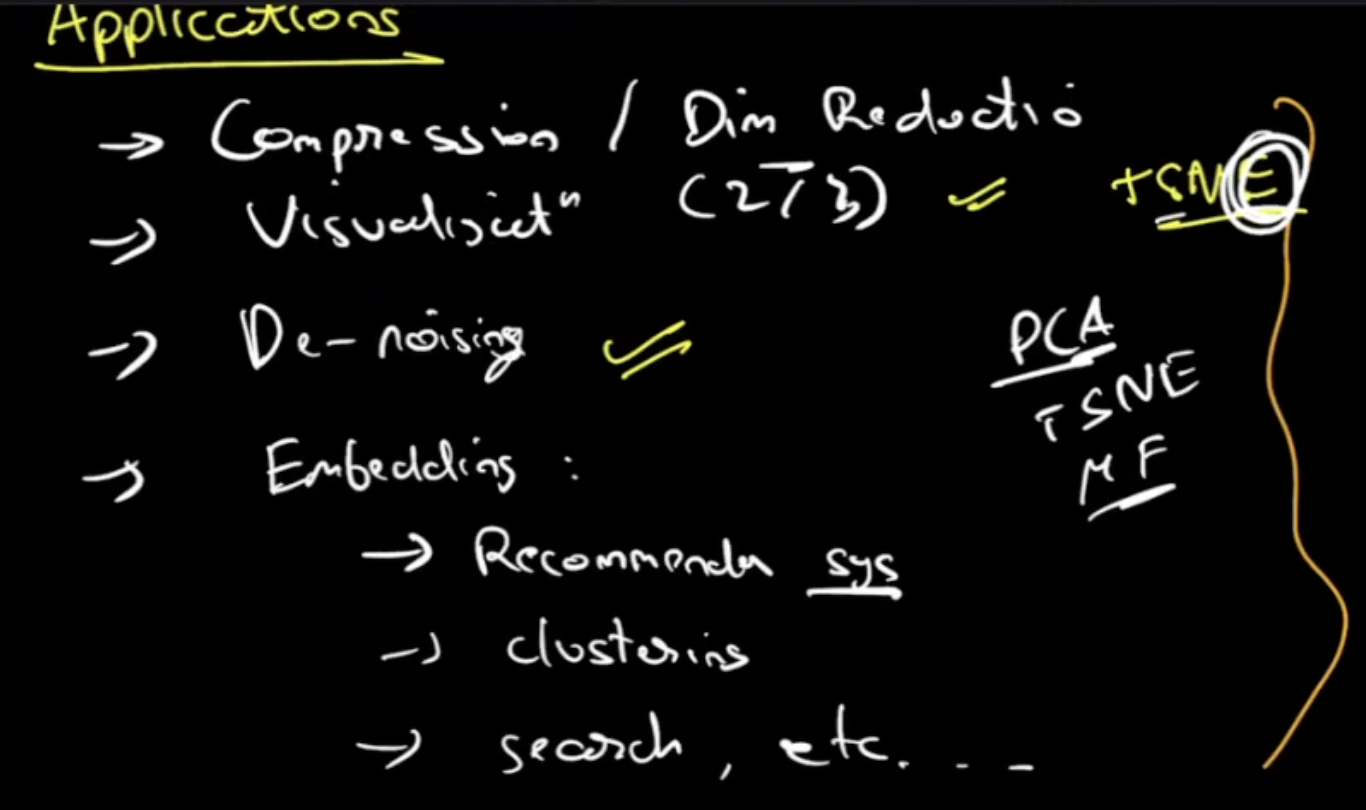

1. Dimensionality reduction or compression: 
    - Here, compression does not mean reducing the space but to reduce the number of features of the input vectors. 
    - Reducing the dimensions translates to,
        - Faster inference time.
        - Low latency.
    - These embeddings can also be used for visualization.
2. Denoising: Autoencoders (AEs) can be used to denoise the data.
3. Embeddings:
    - AEs can be used to generate embeddings.
    - These embeddings can be used for,
        - Recommender systems.
        - Clustering.
        - Image search.

# Dimensionality Reduction

### Can a network equivalent to PCA be created?
Consider that there are $d$ dimensions in the input data and there is a need to reduce the dimension to $d'$. Where, $d' < d$.

The network would look like,

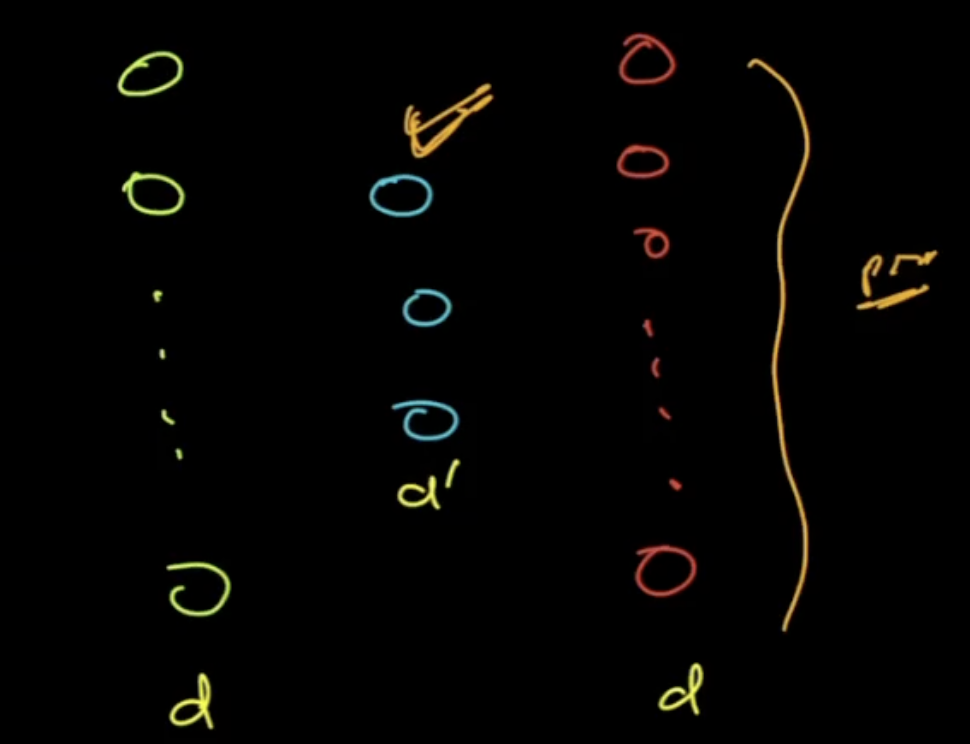

Note that the prediction is not needed. The encoding is needed, since it is possible to go back from encoding means that, encoding must have all the information to recreate the original vector.

### Is it required that the encoders and decoders be symmetric?

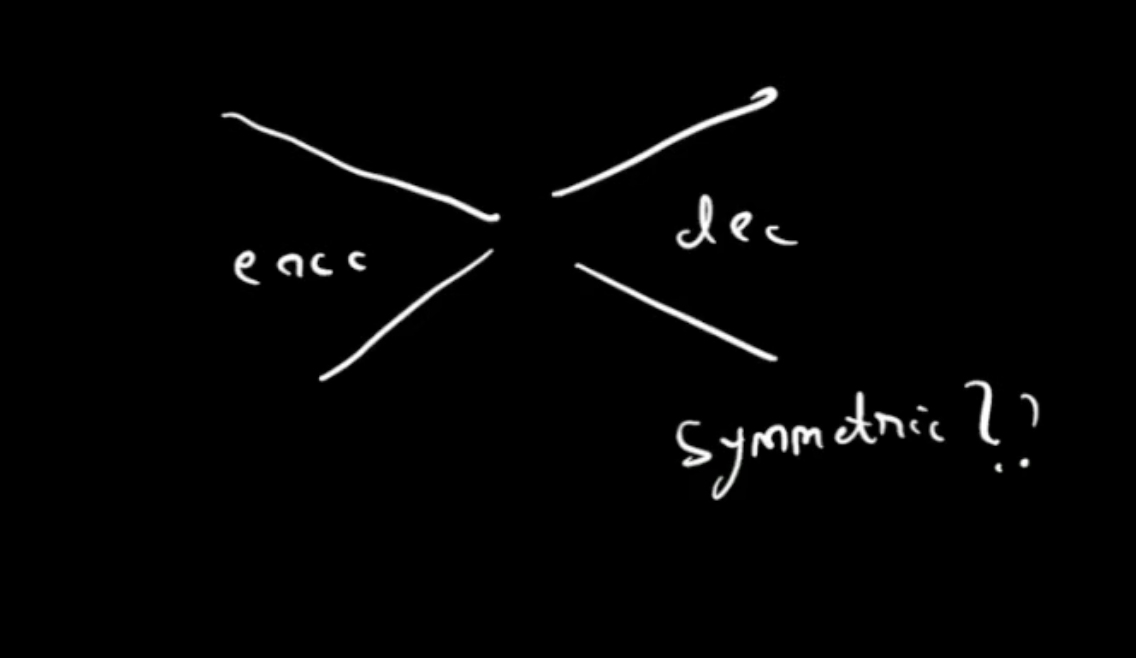

It does not really have to be symmetric. Earlier, it used to be kept symmetric, i.e., same number of layer and same number of Neurons. Also, the weights were shared between encoder and decoder so that the number of parameters are reduced.

There is no more a necessity for the above and weights of encoder and decoder can be separate.

Further reading: https://blog.keras.io/building-autoencoders-in-keras.html

### Implementation of dimensionality reduction (using AE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import keras
from keras import layers
from keras.datasets import mnist

In [2]:
# loading the data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# normalizing the inputs
x_train = x_train.astype("float32")/ 255
x_test = x_test.astype("float32")/ 255

# reshaping the images to 1D vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1: ])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1: ])))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [4]:
# autoencoder model - Functional
input_img = keras.Input(shape = (784, ))
encoded = layers.Dense(128, activation = "relu")(input_img)
encoded = layers.Dense(64, activation = "relu")(encoded)
encoded = layers.Dense(32, activation = "relu")(encoded)

decoded = layers.Dense(64, activation = "relu")(encoded)
decoded = layers.Dense(128, activation = "relu")(decoded)
decoded = layers.Dense(784, activation = "sigmoid")(decoded)

# building the model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(
    optimizer = "adam",
    loss = "binary_crossentropy"
)

# training the model
autoencoder.fit(x_train, x_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (x_test, x_test), verbose = 0)

In [5]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

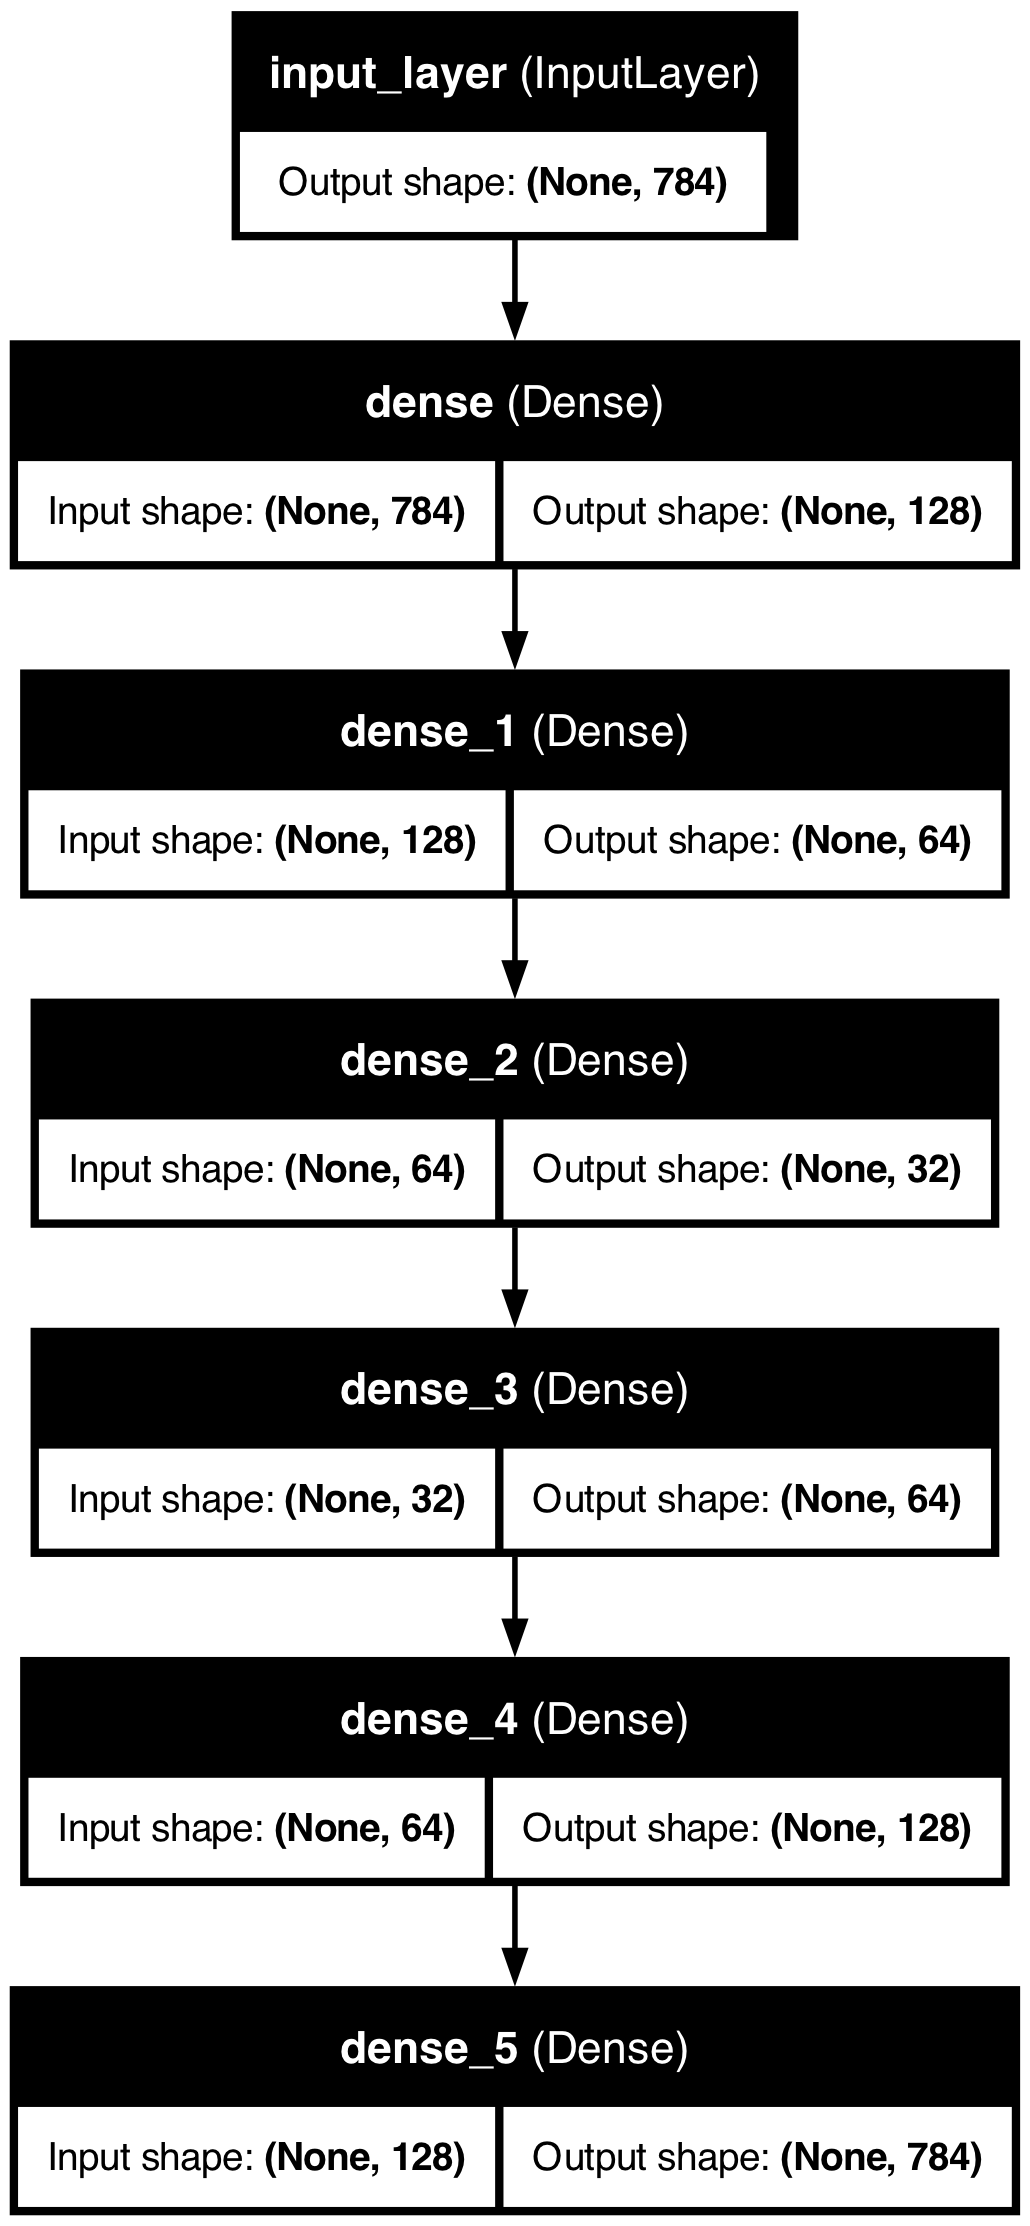

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(autoencoder, to_file = "model.png", show_shapes = True, show_layer_names = True)

In [7]:
# visualizing the output
